Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.5624973773956299s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bno

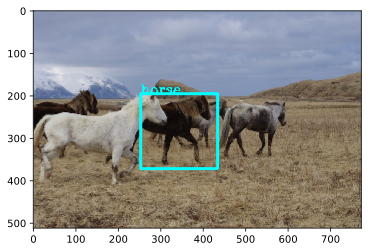

In [3]:
import cv2
import matplotlib.pyplot as plt
from darkflow.net.build import TFNet

%config InlineBackend.figure_format = 'svg'

options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.6,
    'gpu': 1.0
}

tfnet = TFNet(options)

img = cv2.imread('sample_img/sample_horses.jpg',cv2.IMREAD_COLOR)
result = tfnet.return_predict(img)

t1 = (result[0]['topleft']['x'], result[0]['topleft']['y'])
t2 = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

img = cv2.rectangle(img, t1, t2, (255,255,0), 5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.putText(img, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,255), 2)

plt.imshow(img)
plt.show()